 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
df_whale_returns = pd.read_csv(Path('./Resources/whale_returns.csv'),parse_dates=True,index_col='Date',infer_datetime_format=True)
df_whale_returns.sort_index(inplace=True)

In [4]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
df_whale_returns.dropna(inplace=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
df_algo_returns = pd.read_csv(Path('./Resources/algo_returns.csv'),parse_dates = True,index_col = 'Date',infer_datetime_format=True)
df_algo_returns.sort_index(inplace=True)

In [7]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algo_returns.dropna(inplace=True)
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
df_sp500_history = pd.read_csv(Path('./Resources/sp500_history.csv'), parse_dates=True,index_col='Date',infer_datetime_format=True)
df_sp500_history.sort_index(inplace=True)


In [10]:
# Check Data Types
df_sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
df_sp500_history['Close'] = df_sp500_history['Close'].str.replace("$","")
df_sp500_history['Close'] = df_sp500_history['Close'].astype('float')
df_sp500_history

<ipython-input-11-41e86e3b5c81>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sp500_history['Close'] = df_sp500_history['Close'].str.replace("$","")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
df_sp500_daily_return = df_sp500_history.pct_change()
df_sp500_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
df_sp500_daily_return.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500_daily_return.columns = ['SP500']
df_sp500_daily_return

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined_returns = pd.concat([df_whale_returns,df_algo_returns,df_sp500_daily_return],axis='columns', join='inner')
df_combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

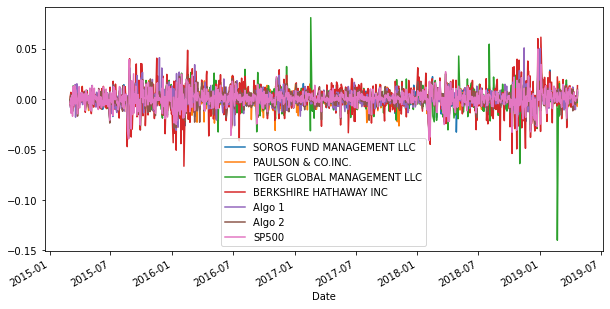

In [16]:
# Plot daily returns of all portfolios
df_combined_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

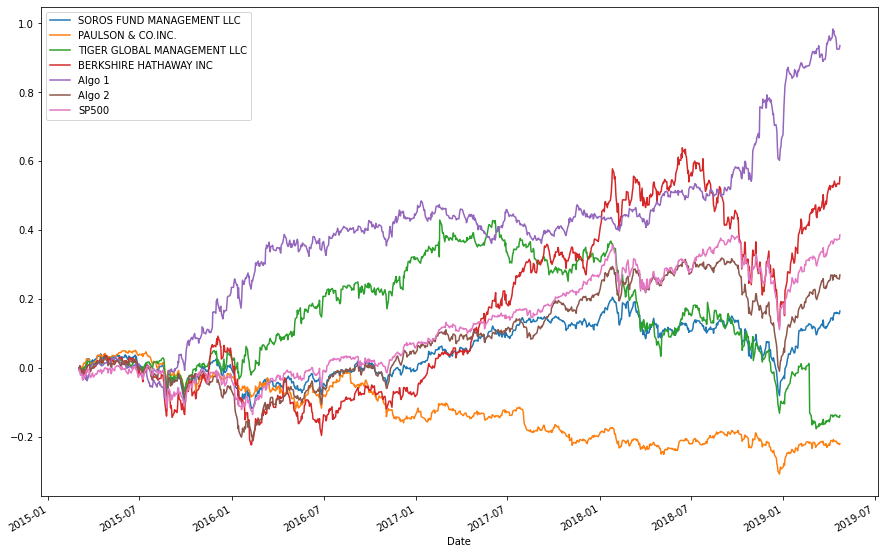

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns Box Plot'}>

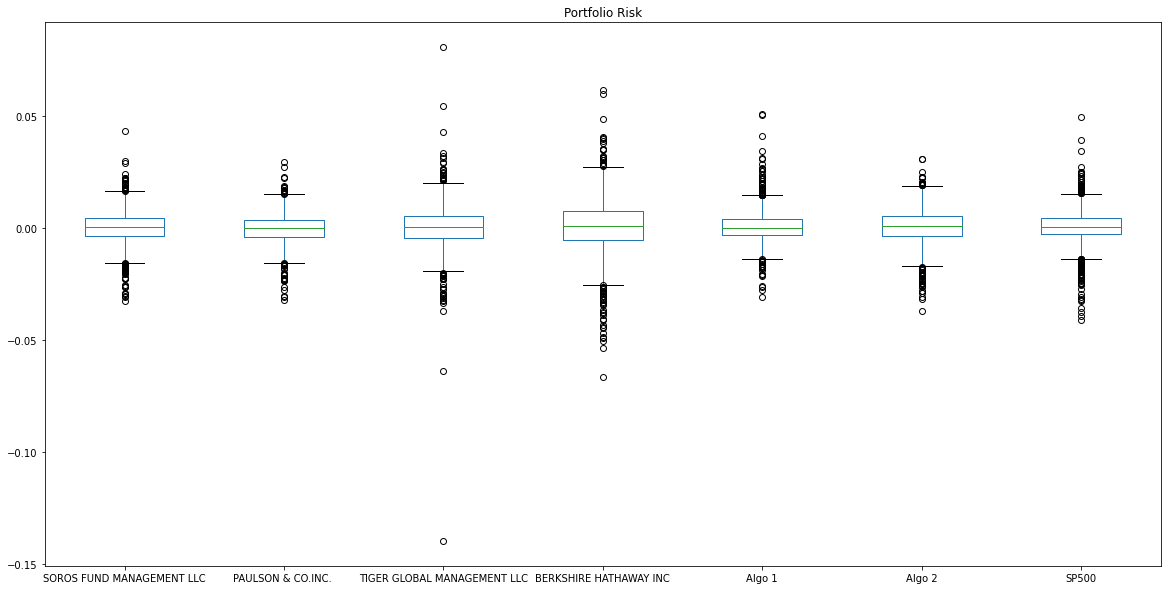

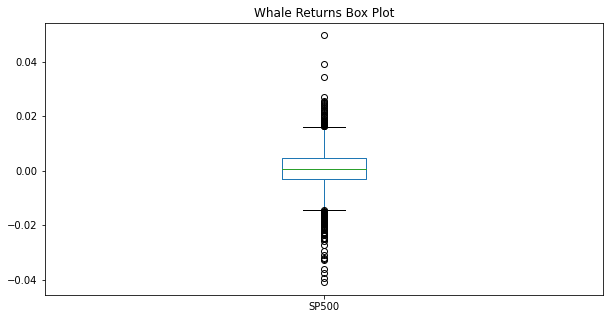

In [18]:
# Box plot to visually show risk
df_combined_returns.plot.box(title= "Portfolio Risk", figsize=(20,10))
df_sp500_daily_return.plot.box(figsize =(10,5), title = 'Whale Returns Box Plot')



### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = df_combined_returns.std()
df_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
df_sp500_history.std()


# Determine which portfolios are riskier than the S&P 500
for stg in df_daily_std.items():
    if stg[0] == 'SP500':
        continue
    elif stg[1] > df_daily_std['SP500']:
        print(f"{stg[0]} - RISK")
    else:
        print(f"{stg[0]} - LOW")
        

SOROS FUND MANAGEMENT LLC - LOW
PAULSON & CO.INC.  - LOW
TIGER GLOBAL MANAGEMENT LLC - RISK
BERKSHIRE HATHAWAY INC - RISK
Algo 1 - LOW
Algo 2 - LOW


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_combined_returns.std() * np.sqrt(252)
annualized_std.sort_values(ascending=False,inplace=True)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_combined_returns.rolling(window=21).std().tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

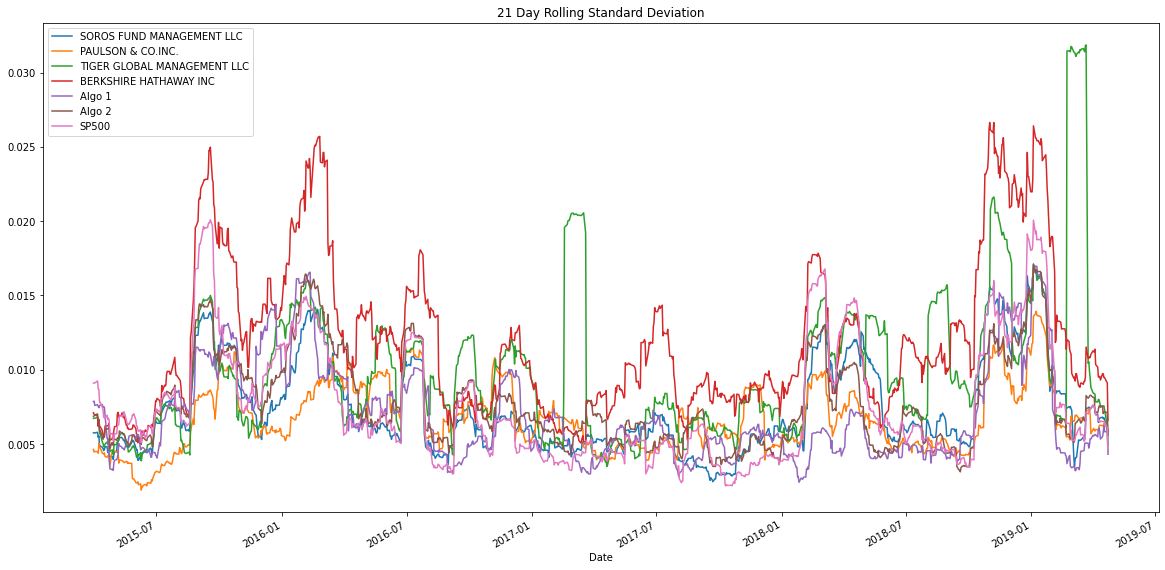

In [23]:
# Plot the rolling standard deviation
df_combined_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


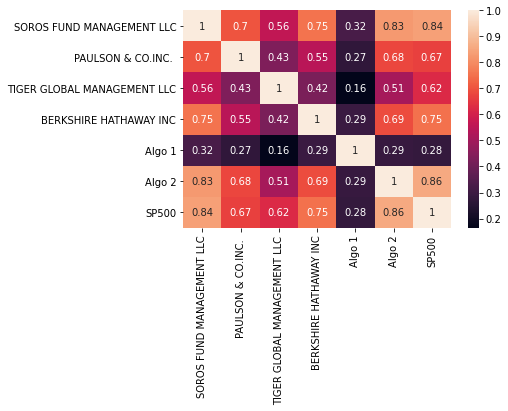

In [47]:
# Calculate the correlation
correlation = df_combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation,annot=True)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

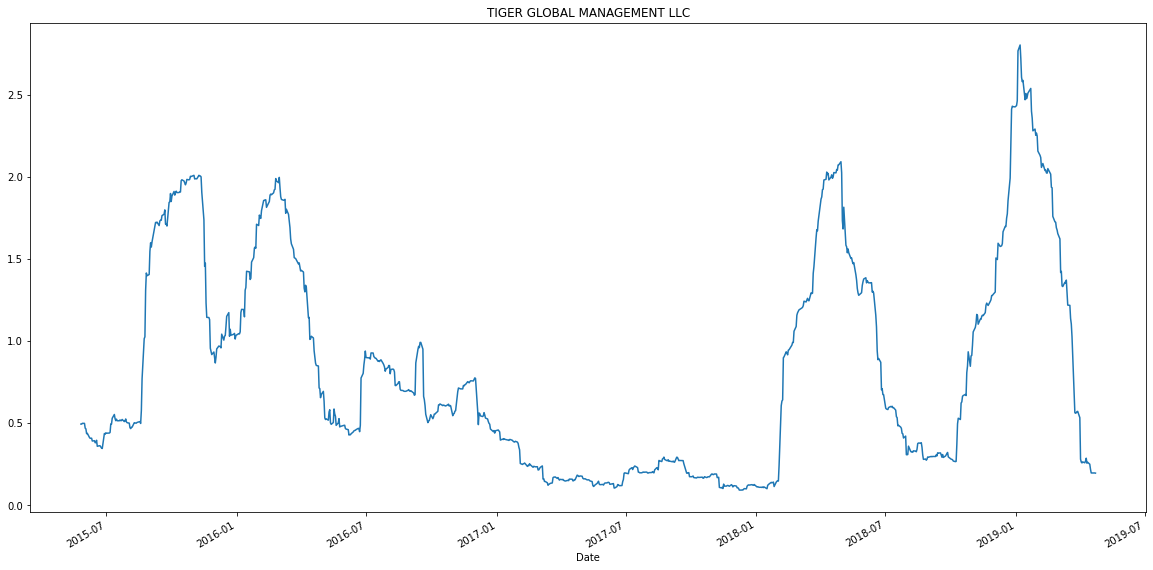

In [38]:
# Calculate covariance of a single portfolio
covariance = df_combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(df_combined_returns['SP500'])

# Calculate variance of S&P 500
variance_sp500 = df_combined_returns['SP500'].var()

# Computing beta
beta = covariance / variance_sp500

# Plot beta trend
beta.plot(figsize=(20,10), title = 'TIGER GLOBAL MANAGEMENT LLC')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Expornential Weighted Average'}, xlabel='Date'>

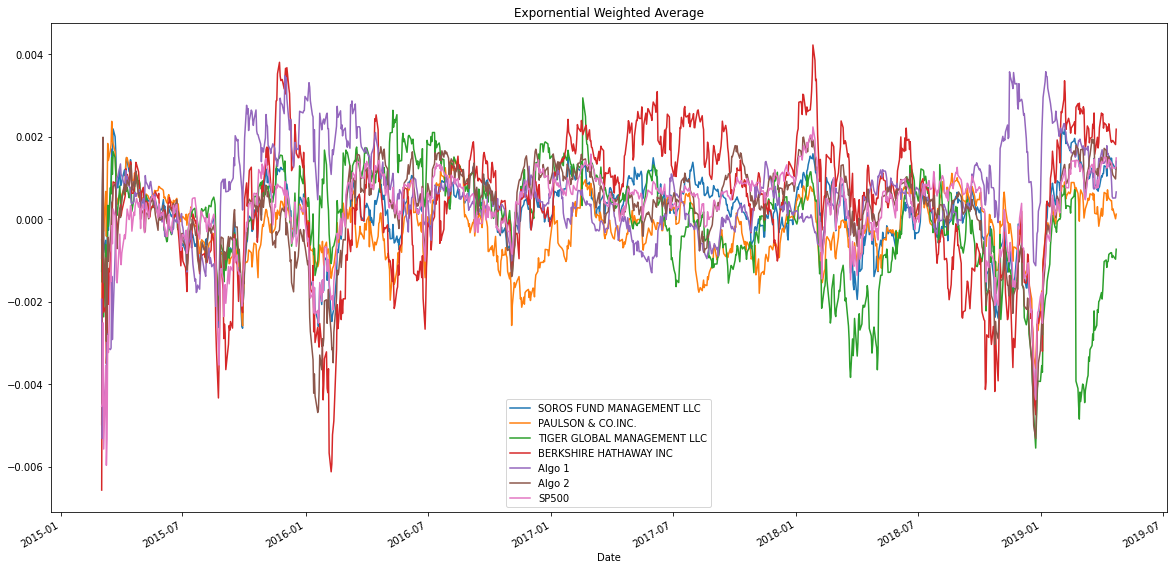

In [39]:
# Use `ewm` to calculate the rolling window
ewm_rolling = df_combined_returns.ewm(halflife=21).mean()
ewm_rolling.plot(figsize=(20,10), title = 'Expornential Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Annualized Sharpe Ratios
annualized_sr = (df_combined_returns.mean() * 252) / (df_combined_returns.std() * np.sqrt(252))
annualized_sr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:>

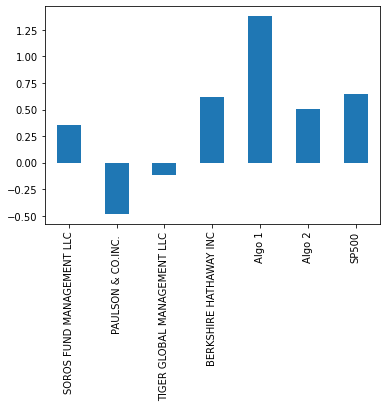

In [49]:
# Visualize the sharpe ratios as a bar plot
annualized_sr.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

* Algo 1 has a higher perfomance, lower volatility and higher sharpe ratio compared to the rest of the portifolio and Sp500

* Algo 2 has lower performance and sharp ratio than SP500, but better when we compare with the average whales portifolios.

* Overall, the algo's strategies could be considered good, if combining both easly beat SP500 and the whales portfolios. However, Algo 1 is the winner for this analysis 





---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [69]:
# Reading data from 1st stock
df_aapl = pd.read_csv(Path('./Resources/aapl_historical.csv'),parse_dates = True,infer_datetime_format=True)
df_aapl.columns = ['symbol','Date','Close']
df_aapl.set_index('Date',inplace=True)
df_aapl.drop(columns=['symbol'], inplace=True)
df_aapl

,Close
Date,
5/9/2019,200.72
5/8/2019,202.90
5/7/2019,202.86
5/6/2019,208.48
5/3/2019,211.75
...,...
5/17/2018,186.99
5/16/2018,188.18
5/15/2018,186.44


In [71]:
# Reading data from 2nd stock
df_cost = pd.read_csv(Path('./Resources/cost_historical.csv'),parse_dates = True,infer_datetime_format=True)
df_cost.columns = ['symbol','Date','Close']
df_cost.set_index('Date',inplace=True)
df_cost.drop(columns=['symbol'], inplace=True)
df_cost

,Close
Date,
5/9/2019,243.47
5/8/2019,241.34
5/7/2019,240.18
5/6/2019,244.23
5/3/2019,244.62
...,...
5/17/2018,199.60
5/16/2018,198.71
5/15/2018,195.48


In [72]:
# Reading data from 3rd stock
df_goog = pd.read_csv(Path('./Resources/goog_historical.csv'),parse_dates = True,infer_datetime_format=True)
df_goog.columns = ['symbol','Date','Close']
df_goog.set_index('Date',inplace=True)
df_goog.drop(columns=['symbol'], inplace=True)
df_goog

,Close
Date,
5/9/2019,1162.38
5/8/2019,1166.27
5/7/2019,1174.10
5/6/2019,1189.39
5/3/2019,1185.40
...,...
5/17/2018,1078.59
5/16/2018,1081.77
5/15/2018,1079.23


In [78]:
# Combine all stocks in a single DataFrame
df_combined = pd.concat([df_aapl,df_cost,df_goog],axis='columns',join='inner')
df_combined

,Close,Close,Close
Date,,,
5/9/2019,200.72,243.47,1162.38
5/8/2019,202.90,241.34,1166.27
5/7/2019,202.86,240.18,1174.10
5/6/2019,208.48,244.23,1189.39
5/3/2019,211.75,244.62,1185.40
...,...,...,...
5/17/2018,186.99,199.60,1078.59
5/16/2018,188.18,198.71,1081.77
5/15/2018,186.44,195.48,1079.23


In [79]:
# Reset Date index


In [81]:
# Reorganize portfolio data by having a column per symbol
df_combined.columns = ['AAPL','COST','GOOGL']
df_combined

,AAPL,COST,GOOGL
Date,,,
5/9/2019,200.72,243.47,1162.38
5/8/2019,202.90,241.34,1166.27
5/7/2019,202.86,240.18,1174.10
5/6/2019,208.48,244.23,1189.39
5/3/2019,211.75,244.62,1185.40
...,...,...,...
5/17/2018,186.99,199.60,1078.59
5/16/2018,188.18,198.71,1081.77
5/15/2018,186.44,195.48,1079.23


In [127]:
# Calculate daily returns
custom_daily_return = df_combined.pct_change()
# Drop NAs
custom_daily_return.dropna(inplace=True)
# Display sample data
custom_daily_return.head()

,AAPL,COST,GOOGL
Date,,,
5/8/2019,0.010861,-0.008749,0.003347
5/7/2019,-0.000197,-0.004806,0.006714
5/6/2019,0.027704,0.016862,0.013023
5/3/2019,0.015685,0.001597,-0.003355
5/2/2019,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [128]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_return = custom_daily_return.dot(weights)
custom_portfolio_return
custom_portfolio_cumulative = (1 + custom_portfolio_return).cumprod()
# Display sample data
custom_portfolio_cumulative.head()

Date
5/8/2019    1.001820
5/7/2019    1.002391
5/6/2019    1.021633
5/3/2019    1.026376
5/2/2019    1.012898
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [130]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns = pd.concat([cumulative_returns, custom_portfolio_cumulative], axis="columns", join="inner")
len(all_portfolios_returns)


0

In [117]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!